# Desarrollo de un proceso de simulación del proceso de de vacunación en Ecuador utilizando Julia

![julia logo](https://juliacomputing.com/assets/img/jcl-logo.png)


> **estudiante:** Bryam David Vega Moreno <br>
> **docente:** Ing. Diego Quisi <br>
> **univesidad:** Universidad Politécnica Salesiana

-----

## Que es Julia?

El lenguaje de programación Julia ha sido diseñado para disponer de las ventajas de un lenguaje dinámico con el rendimiento de un lenguaje compilado. Esto se consigue en parte gracias a la utilización de un compilador JIT (just-in-time) basado en LLVM (Low Level Virtual Machine) que permite generar código de máquina completamente nativo.

El lenguaje de programación Julia es muy atractivo para los científicos de datos, estadísticos y analistas financieros, ya que es fácil de aprender y ofrece un gran rendimiento. Su mayor problema, ahora mismo, es que se trata de un lenguaje joven, solo tiene dos años de antigüedad y no ofrece la cantidad de librerías y recursos que, por ejemplo, ofrecen R, Python o Matlab.


## Características de Julia

* Permite definir el comportamiento de las funciones a través de diversas combinaciones de tipos de argumentos.
* Sistema de tipado dinámico.
* Buen desempeño, acercándose al de lenguajes estáticamente compilados como C.
* Gestor de paquetes integrado.
* Macros tipo Lisp y otras herramientas para la meta-programación.
* Llamada a funciones de Python mediante el paquete PyCall.
* Llamada funciones de C directamente, sin necesidad de usar APIs especiales.
* Poderosas características de línea de comandos para gestionar otros procesos.
* Diseñado para la computación paralela y distribuida.
* Los tipos definidos por el usuario son tan rápidos y compactos como los tipos estándar integrados.
* Generación automática de código eficiente y especializado para diferentes tipos de argumentos.
* Conversiones y promociones para tipos numéricos y de otros tipos, elegantes y extensibles.
* Soporte eficiente para Unicode, incluyendo UTF-8 pero sin limitarse solo a este.
* Licencia libre y de código abierto.

## Julia en el campo de la simulación de eventos discretos con SimJulia

Julia al tener un parecido con el lenguaje de programación Python, estos utilizan algunos conceptos y librerías de ellas, es por ello, que Julia presenta su propia libreria de simulación de eventos discretos llamado **SimJulia** la cual esta basada en la libreria **Simpy**, sin embargo, su manera de utilizar difiere mucho a diferencia de Simpy. He aquí algunas diferencias que se explicaran en un ejemplo que se realizara para entender como funciona Julia.

Para más información visitar la documentación oficial **<a href="https://benlauwens.github.io/SimJulia.jl/stable/">[aquí]</a>**

Si cuenta con una versión de Julia inferior a **0.8.1** visitar esta documentación **<a href="https://simjuliajl.readthedocs.io/en/stable/welcome.html">[aquí]</a>**


<div class="alert alert-danger">
  <strong>Tomar muy en cuenta las versiones de SimJulia ya que su sintaxis es diferente</strong>
</div>


# Ejemplo de simulación con SimJulia

## Simulando un carwash

Anteriormente hemos visto como realizar una simulación de un carwash utilizando Simpy, en esta ocasión realizamos un proceso más reducido utilizando SimJulia con el fin de demostrar como funciona esta librería

### Importando librerias

Para poder trabajar con SimJulia debemos utilizar la liberia SimJulia y ResumableFunctions ya que estas van de la mano para realizar los procesos de simulación. Otras librerias como Pkg y random seran utiles para al proceso dentro de la simulación.

In [1]:
using SimJulia
using Pkg
using PyCall
using Plots
using Random
using ResumableFunctions

### Creando los parametros
Igualmente como en python, la creación de parametros es la misma ya que no cambian en nada, por tanto podemos realizar la misma programación para crear nuestros parámetros

In [2]:
INIT_CARS = 4
NUM_MACHINES = 3
TIME_SIM  = 10
INTERVAL  = 9

9

### Creando las funciones de la simulación

En este punto es donde se tiene la diferencia con python ya que Julia utiliza **ResumableFunctions** que es un concepto de **C**, en donde se nos permite trabajar de manera asincrónica mejorando el rendimiento. A diferencia de python, Julia trata de mejorar su rendimiento sin dejar de ser un lenguaje de alto nivel, haciendolo un lenguaje equilibrado. Para poder ejecutar procesos asincrónicos se utiliza la anotación **resumable** mientras que para guardar un estado asincrónico se utiliza **yield**. A continuación dejamos una comparación de una simulación de python con julia:

* **Python con Simpy**

```python
def execute_simulation(env,id,machines):
    print("llega {} a la hora: {}".format(id,env.now))
    with machines.request() as maquina:
        yield maquina
        print("Entra {} a la hora: {}".format(id,env.now))
        yield env.timeout(random.randint(2,5))
        print("lavado {} a la hora: {}".format(id,env.now))
        print("Sale {} a la hora: {}".format(id,env.now))
```
* **Julia con SimJulia**

```julia
@resumable function execute_simulation(env::Environment,id::Integer,machines::Resource)
    println("llega $([id]) a la hora: $([now(env)])")
    @yield request(machines)
    println("Entra $([id]) a lavarse a la hora: $([now(env)])")
    @yield timeout(env,rand((2,5)))
    println("Lavado $([id]) a la hora: $([now(env)]) ")
    @yield release(machines)
    println("Sale $([id]) a la hora: $([now(env)])")
end
```

Como podemos ver, existe una gran diferencia entre ambos lenguajes de programación. A continuación procedemos a mostrar la función de la simulación del car_wash:

In [3]:
@resumable function execute_simulation(env::Environment,id::Integer,machines::Resource)
    println("llega $([id]) a la hora: $([now(env)])")
    @yield request(machines)
    println("Entra $([id]) a lavarse a la hora: $([now(env)])")
    @yield timeout(env,rand((2,5)))
    println("Lavado $([id]) a la hora: $([now(env)]) ")
    @yield release(machines)
    println("Sale $([id]) a la hora: $([now(env)])")
end
    

execute_simulation (generic function with 1 method)

### Ejecutando la simulación

Para ejecutar la simulación a diferencia de python, Julia utiliza la clase **Simulation** para iniciar su simulación y a sy vez la anotación **process** para crear un proceso de simulación, recordemos que esto se ejecuta de manera asincrónica.

In [4]:
env = Simulation()
machines = Resource(env,NUM_MACHINES)
println("=========","Carwash","=========")
for i=1:INIT_CARS
    @process execute_simulation(env,i,machines)
end
run(env,20)

=========Carwash=========
llega [1] a la hora: [0.0]
llega [2] a la hora: [0.0]
llega [3] a la hora: [0.0]
llega [4] a la hora: [0.0]
Entra [1] a lavarse a la hora: [0.0]
Entra [2] a lavarse a la hora: [0.0]
Entra [3] a lavarse a la hora: [0.0]
Lavado [1] a la hora: [2.0] 
Sale [1] a la hora: [2.0]
Entra [4] a lavarse a la hora: [2.0]
Lavado [4] a la hora: [4.0] 
Sale [4] a la hora: [4.0]
Lavado [2] a la hora: [5.0] 
Lavado [3] a la hora: [5.0] 
Sale [2] a la hora: [5.0]
Sale [3] a la hora: [5.0]


# Proceso de vacunación en Ecuador

![ecuador logo](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Politics_of_Ecuador_-_Guillermo_Lasso_Administration_logo.svg/2560px-Politics_of_Ecuador_-_Guillermo_Lasso_Administration_logo.svg.png)

Actualmente, con la llegada del nuevo gobierno, en el cual se ha posesionado el señor Guillermo Lasso como nuevo presidente de la república del Ecuador, en su plan de gobierno se tiene el plan de vacunación denominado 9-100. Este plan consiste en vacunar a 9 millones de Ecuatorianos en 100 días. Por tanto, el día 31/05/2021 a las 12:30 se ha presentado el plan de vacunación. Por tanto este plan consta de la siguiente manera:

* Se tendra ayuda del CNE y del ministerio de educación para vacunar a la gente utilizando su padrón electoral y los recintos electorales autorizados para la vacunación.
* Hasta el momento se cuenta con 317 recintos electorales en donde se realizará el proceso de vacunación.
* Se tomara en cuenta que cada día se vacunara al rededor de 100 personas en cada recinto.
* El horario de vacunación se realizara de 8:00 am a 17:00 pm de Lunes a Domingo.
* No se ha específicado la cantidad de personal para cada recinto, sin embargo, podríamos decir que puede existir al rededor de 5 personas en mesa y que realizan el examen, 5 personas que toman los datos, 5 personas que realizan el proceso de vacunación y entregan el certificado creado por la persona que toma los datos, contanto al final con un total de 15 trabajadores en el recinto.


El gobierno actualmente cuenta con 700 mil vacunas las cuales sera repartidas en todos los recintos, no se tiene estimado cuantas vacunas se distribuiran, sin embargo,tomando en cuenta el número de vacunados por día, se estimaría que llegarían 700 vacunas semanales, es decir, 100 vacunas por día para las 100 personas vacunadas.

Para saber sobre el proceso de plan 9-100 hacer click: **<a href = "https://www.facebook.com/LassoGuillermo/videos/384590036215906">[aquí]</a>**

## Proceso de simulación

Después de tener en cuenta el proceso de vacunación que se llevará a cabo, se tiene en cuenta los siguientes requerimentos:

* Se realizaran los **100** días del proceso de vacunación en **1** recinto
* Se realizara el proceso de vacunación de ambas dosis **dependiendo de la vacunación de la persona** (si se vacuna una persona con la primera dosis, se le asigna una fecha para la segunda dosis)
* En caso de que la persona tenga un problema de salud, se le **reagendara una cita** en los días siguientes
* En caso de que se acaben las vacunas, se les **reagendara una cita** en los siguientes días
* Las personas a las que se les reasigna la cita **tendran prioridad** ante las personas que tienen cita ese día
* El proceso de simulación se ira realizando sobre la marcha, es decir, que si en esos **100 días se alcanza el límite de personas empadronadas en el recinto** se termina la simulación indicando que no se ha realizado la vacunación.
* El 80% de las personas empadronadas en el recinto se vacunaran, mientras que el 20% se vacunara en otro país

### Datos para la simulación

Para este caso tomaremos el número de electores del recinto UPS, para este caso. El recinto de la Universidad Politecnica Salesiana de la parroquia el vecino que tiene un total de:

* **electores:** 43512
* **recintos electorales:** 6

Con estos datos podriamos decir que la Universidad Politécnica Salesiana cuenta con un total de **7252 personas** empadronadas en dicho recinto. Con estos datos podemos tomar en cuenta que si solamente se vacunara el 80% de personas empadronadas, eso significa que  **5802 personas** asistirán al recinto de vacunación.


Ademas tomemos en cuenta que se vacunara en un horario de **8:00am a 17:00pm** que termina en un total de **9 horas** que pasandolo a minutos representa **540 min** de simulación por cada día.

Con este conjunto de datos recolectados procedemos a crear los parámetros de nuestra simulación. Para más información sobre los datos obtenidos acceder **<a href="http://portal.cne.gob.ec/documents/Estadisticas/cne_registro_electoral.pdf">[aquí]</a>**


### Creación de parametros

Con los datos recolectados procedemos a crear los parametros con el fin de preparar nuestra simulación y trabajar con dichos parametros. Para ello definimos los siguientes parametros:

* **NUM_DAYS:** Días del proceso de vacunación.
* **NUM_VACCINES:** Número de vacunas que deberían llegar al recinto.
* **PERSONS:** Personas totales del recinto.
* **NUM_PERSONAL_EXAM:** Personas que estaran en mesa y realizaran los examenes.
* **NUM_PERSONAL_DATA:** Personas que tomaran los datos al paciente.
* **NUM_PERSONA_VACCINE:** Personas que vacunaran al ciudadano.
* **DATA_PERSONS:** Recolecta los datos del proceso de vacunación.
* **TIME_SIM:** Tiempo en el que se realiza la vacunación

In [3]:
COUNT_PERSONS_INIT     = 0
COUNT_PERSONS          = 0
NUM_PERSONS            = 0
DAYS                   = 1
NUM_DAYS               = 100
NUM_VACCINES           = 20000
PERSONS                = 5802
INTERVAL               = 5
NUM_PERSONAL_EXAM      = 5
NUM_PERSONAL_DATA      = 5
NUM__PERSONAL_VACCINE  = 5
DATA_PERSONS           = Dict{Integer,Person}()
TIME_SIM               = 540

540

### Creación de clases y métodos para la simulación

In [2]:
mutable struct Person
    id::Integer
    name::String
    cite::Integer
    dose::Integer
    wait::Integer
end

@resumable function exam_process(env::Environment)
    @yield timeout(env,20)
end

@resumable function data_process(env::Environment)
    @yield timeout(env,rand(2:4))
end
    
@resumable function vaccine_process(env::Environment)
    global NUM_VACCINES
    NUM_VACCINES = NUM_VACCINES - 1
    @yield timeout(env,rand(5:10))
end

@resumable function certificate_process(env::Environment)
    @yield timeout(env,rand(1:3))
end
    
@resumable function exit_process(env::Environment)
    @yield timeout(env,rand(1:5))
end

function change_cite(person::Person,message::String)
    if person.dose == 0
        person.cite = DAYS+20
    elseif person.dose == 1
        person.cite = DAYS+20
    end
    return person
end

@resumable function vacunation_process(env::Environment,person::Person,exam::Resource,
        data::Resource,vaccine::Resource) 
    
    ## proceso de revisión
    @yield request(exam)
    start= now(env)
    @yield @process exam_process(env)
    
    if rand(1:10)<8
        @yield release(exam)
        
        
        ## proceso de toma de datos
        @yield request(data)
        @yield @process data_process(env)
        @yield release(data)

        ## proceso de vacunación
        @yield request(vaccine)
        @yield @process vaccine_process(env)
        person.dose+=1
        
        ## fecha de certificado y segunda dosis
        person = change_cite(person,"siguiente fecha de vacunación")
        @yield @process certificate_process(env)
        @yield release(vaccine)
        
    else
        person = change_cite(person,"no pasa la revisión, reagenda fecha")
        @yield release(exam)
    end
    
    @yield @process exit_process(env)
    person.wait = now(env) - start
    
    DATA_PERSONS[person.id] = person
end

@resumable function execute_simulation(env::Environment,exam::Resource,
    data::Resource,vaccine::Resource,list_persons)
    global NUM_PERSONS,COUNT_PERSONS,COUNT_PERSONS_INIT
    persons = 0
    
    for i in list_persons
        @process vacunation_process(env,i,exam,data,vaccine)
        COUNT_PERSONS_INIT+=1
    end
    while persons < 100
        if length(DATA_PERSONS) == PERSONS
            break
        else
           @yield timeout(env,rand(INTERVAL-2:INTERVAL))
           name = string("persona_",NUM_PERSONS)
           person = Person(NUM_PERSONS,name,DAYS,0,0)
           @process vacunation_process(env,person,exam,data,vaccine)
           NUM_PERSONS+=1
           COUNT_PERSONS+=1
           persons+=1
        end
    end
    
end

function init_persons()
    global NUM_PERSONS
    list_return = []
    for i=1:6
        name = string("persona_",NUM_PERSONS)
        person = Person(NUM_PERSONS,name,DAYS,0,0)
        NUM_PERSONS+=1
        push!(list_return,person)
    end
    return list_return
end

function filter_persons()
    filter_list = []
    for i in values(DATA_PERSONS)
        if i.dose<2 && i.cite==DAYS
            push!(filter_list,i)
        end
    end
    return filter_list
end

filter_persons (generic function with 1 method)

### Ejecución de la simulación

In [4]:
println("=========="," PROCESO VACUNACIÓN - RECINTO UPS ","==========")
println("Autor: Bryam David Vega Moreno")
println("Materia: Simulación")
println("Universidad: Universidad Politécnica Salesiana")
println("==========","      INICIANDO SIMULACIÓN        ","==========")

list_persons = init_persons()
while DAYS<=NUM_DAYS
    println("================================ ","              DIA $DAYS             "," ================================")
    env     = Simulation()
    exam    = Resource(env,NUM_PERSONAL_EXAM)
    data    = Resource(env,NUM_PERSONAL_DATA)
    vaccine = Resource(env,NUM__PERSONAL_VACCINE)
    @process execute_simulation(env,exam,data,vaccine,list_persons)
    run(env,TIME_SIM)
    println("Total de personas: ",length(DATA_PERSONS),
        "\n - personas llegadas al día: ",COUNT_PERSONS,
        "\n - personas reagendadas o iniciales: ",COUNT_PERSONS_INIT,
        "\n - vacunados con 1 dosis: ",length([i for i in values(DATA_PERSONS) if i.dose==1]),
        "\n - vacunados con 2 dosis: ",length([i for i in values(DATA_PERSONS) if i.dose==2]),
        "\n - no vacunados: ",length([i for i in values(DATA_PERSONS) if i.dose==0]),
        "\n - vacunas sobrantes: ",NUM_VACCINES)
    DAYS+=1
    COUNT_PERSONS=0
    COUNT_PERSONS_INIT=0
    list_persons=filter_persons()
end

========== PROCESO VACUNACIÓN - RECINTO UPS ==========
Autor: Bryam David Vega Moreno
Materia: Simulación
Universidad: Universidad Politécnica Salesiana
==========      INICIANDO SIMULACIÓN        ==========
================================               DIA 1              ================================
Total de personas: 106
 - personas llegadas al día: 100
 - personas reagendadas o iniciales: 6
 - vacunados con 1 dosis: 76
 - vacunados con 2 dosis: 0
 - no vacunados: 30
 - vacunas sobrantes: 19924
================================               DIA 2              ================================
Total de personas: 206
 - personas llegadas al día: 100
 - personas reagendadas o iniciales: 0
 - vacunados con 1 dosis: 148
 - vacunados con 2 dosis: 0
 - no vacunados: 58
 - vacunas sobrantes: 19852
================================               DIA 3              ================================
Total de personas: 306
 - personas llegadas al día: 100
 - personas reagendadas o iniciales: 0

 - personas llegadas al día: 100
 - personas reagendadas o iniciales: 100
 - vacunados con 1 dosis: 1339
 - vacunados con 2 dosis: 391
 - no vacunados: 508
 - vacunas sobrantes: 17877
================================               DIA 29              ================================
Total de personas: 2267
 - personas llegadas al día: 100
 - personas reagendadas o iniciales: 100
 - vacunados con 1 dosis: 1343
 - vacunados con 2 dosis: 437
 - no vacunados: 487
 - vacunas sobrantes: 17780
================================               DIA 30              ================================
Total de personas: 2297
 - personas llegadas al día: 100
 - personas reagendadas o iniciales: 100
 - vacunados con 1 dosis: 1325
 - vacunados con 2 dosis: 492
 - no vacunados: 480
 - vacunas sobrantes: 17688
================================               DIA 31              ================================
Total de personas: 2327
 - personas llegadas al día: 100
 - personas reagendadas o iniciales: 100
 -

================================               DIA 56              ================================
Total de personas: 3378
 - personas llegadas al día: 100
 - personas reagendadas o iniciales: 80
 - vacunados con 1 dosis: 1287
 - vacunados con 2 dosis: 1690
 - no vacunados: 401
 - vacunas sobrantes: 15325
================================               DIA 57              ================================
Total de personas: 3430
 - personas llegadas al día: 100
 - personas reagendadas o iniciales: 78
 - vacunados con 1 dosis: 1294
 - vacunados con 2 dosis: 1731
 - no vacunados: 405
 - vacunas sobrantes: 15236
================================               DIA 58              ================================
Total de personas: 3482
 - personas llegadas al día: 100
 - personas reagendadas o iniciales: 77
 - vacunados con 1 dosis: 1314
 - vacunados con 2 dosis: 1764
 - no vacunados: 404
 - vacunas sobrantes: 15149
================================               DIA 59              =========

Total de personas: 4573
 - personas llegadas al día: 100
 - personas reagendadas o iniciales: 88
 - vacunados con 1 dosis: 1328
 - vacunados con 2 dosis: 2883
 - no vacunados: 362
 - vacunas sobrantes: 12893
================================               DIA 84              ================================
Total de personas: 4620
 - personas llegadas al día: 100
 - personas reagendadas o iniciales: 83
 - vacunados con 1 dosis: 1333
 - vacunados con 2 dosis: 2927
 - no vacunados: 360
 - vacunas sobrantes: 12800
================================               DIA 85              ================================
Total de personas: 4670
 - personas llegadas al día: 100
 - personas reagendadas o iniciales: 80
 - vacunados con 1 dosis: 1339
 - vacunados con 2 dosis: 2968
 - no vacunados: 363
 - vacunas sobrantes: 12712
================================               DIA 86              ================================
Total de personas: 4707
 - personas llegadas al día: 100
 - personas reagend

## Reportes de la simulación

### Datos generales

In [5]:
println("Se han vacunado a un total de: ",length(keys(DATA_PERSONS))," personas")
println("Se han vacunado con 1 dosis a un total de: ",length([i for i in values(DATA_PERSONS) if i.dose==1])," personas")
println("Se han vacunado con 2 dosis a un total de: ",length([i for i in values(DATA_PERSONS) if i.dose==2])," personas")
println("No se ha vacunado a un total de: ",length([i for i in values(DATA_PERSONS) if i.dose==0])," personas")

Se han vacunado a un total de: 5349 personas
Se han vacunado con 1 dosis a un total de: 1275 personas
Se han vacunado con 2 dosis a un total de: 3672 personas
No se ha vacunado a un total de: 402 personas


### Personas vacunadas en el recinto

In [6]:
using PyCall
pd = pyimport("pandas")

PyObject <module 'pandas' from '/Users/bvegam/.julia/conda/3/lib/python3.8/site-packages/pandas/__init__.py'>

In [7]:
list_df=[]
for i in values(DATA_PERSONS)
    if(i.dose>1)
        tuple=(i.id,i.name,i.dose,i.wait)
        push!(list_df,tuple)
    end
end
df=pd.DataFrame(list_df,columns=["id","name","dose","wait"]).sort_values("id").head(10)

,id,name,dose,wait
645,0,persona_0,2,31
3290,1,persona_1,2,40
391,2,persona_2,2,34
3455,3,persona_3,2,35
626,4,persona_4,2,36
2370,5,persona_5,2,35
819,6,persona_6,2,36
1502,7,persona_7,2,34
3617,8,persona_8,2,31
406,9,persona_9,2,32


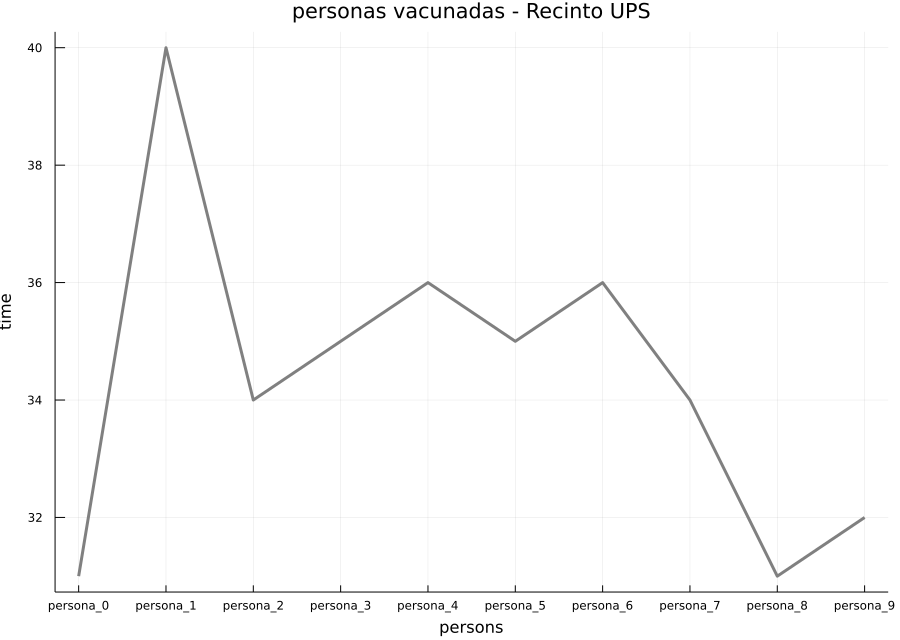

In [8]:
plot(df["name"].tolist(),df["wait"].tolist(),color="grey",size=(900,640),title="personas vacunadas - Recinto UPS"
,label="",xlabel="persons",ylabel="time", lw = 3)

### Personas no vacunadas en el recinto

In [9]:
list_df=[]
for i in values(DATA_PERSONS)
    if(i.dose==0)
        tuple=(i.id,i.name,i.dose,i.wait)
        push!(list_df,tuple)
    end
end
df=pd.DataFrame(list_df,columns=["id","name","dose","wait"]).sort_values("id").head(10)

,id,name,dose,wait
325,84,persona_84,0,22
12,723,persona_723,0,24
234,787,persona_787,0,21
229,1184,persona_1184,0,22
107,2110,persona_2110,0,24
328,2229,persona_2229,0,23
344,2610,persona_2610,0,21
322,3010,persona_3010,0,25
255,3325,persona_3325,0,21
399,3816,persona_3816,0,24


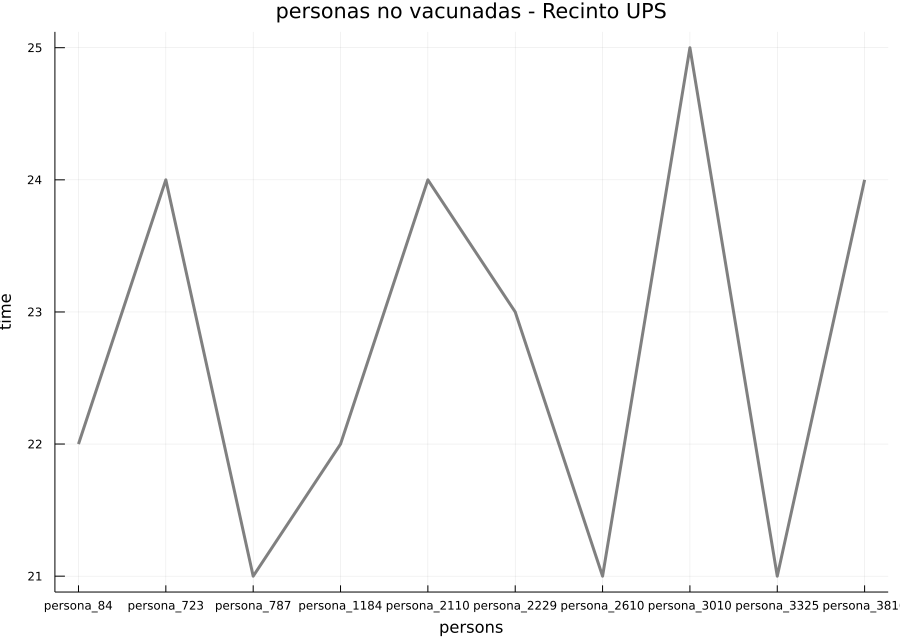

In [10]:
plot(df["name"].tolist(),df["wait"].tolist(),color="grey",size=(900,640),title="personas no vacunadas - Recinto UPS"
,label="",xlabel="persons",ylabel="time", lw = 3)

### Porcentaje de personas vacunadas y no vacunadas

In [11]:
x = ["1 dosis", "2 dosis", "no vacunados"]
y = [length([i for i in values(DATA_PERSONS) if i.dose==1])/length(DATA_PERSONS), 
    length([i for i in values(DATA_PERSONS) if i.dose==2])/length(DATA_PERSONS), 
    length([i for i in values(DATA_PERSONS) if i.dose==0])/length(DATA_PERSONS)]

3-element Vector{Float64}:
 0.23836231071228267
 0.6864834548513741
 0.07515423443634324

In [15]:
using Plotly

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-17865498208121123276\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-16218520482609386839\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-17865498208121123276\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

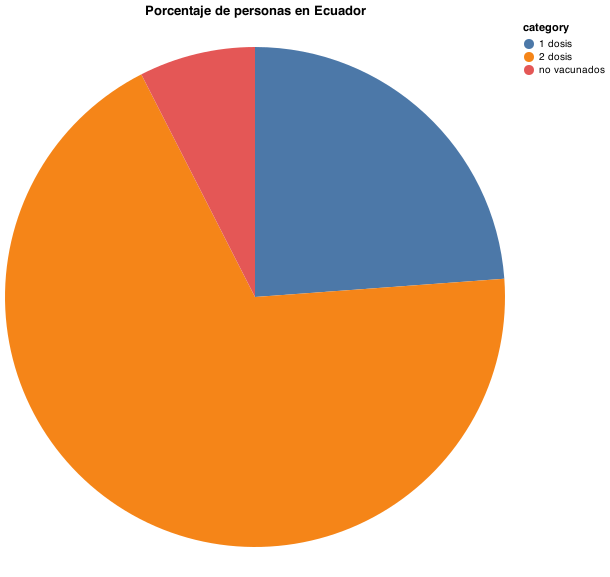

In [12]:
using VegaLite, DataFrames

df = DataFrame(category=x, value=y)
df |> @vlplot(:arc, theta=:value, color="category:n", view={stroke=nothing},title="Porcentaje de personas en Ecuador",
    width=500,
    height=550)

### Tiempo promedio

In [13]:
list_df=[]
for i in values(DATA_PERSONS)
    tuple=(i.id,i.name,i.dose,i.wait)
    push!(list_df,tuple)
end
df=pd.DataFrame(list_df,columns=["id","name","dose","wait"]).sort_values("id").head(10)
println("El tiempo promedio para el proceso de vaunación por persona es: ",df["wait"].mean())

El tiempo promedio para el proceso de vaunación por persona es: 34.4
